## Project outline

### Data wrangling:

1. Gathering data 
2. Assessing data
3. Cleaning data
4. Storing, analyzing, and visualizing your wrangled data
5. Conclusions

## Gathering data
### 1. Load 'The WeRateDogs Twitter archive' 

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [108]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### 2. Download the 'The tweet image predictions' 
The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. 

In [109]:
import requests

# using requests to download data 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
download = requests.get(url)
download

<Response [200]>

In [110]:
# get content type 
download.headers.get('content-type')

'text/tab-separated-values; charset=utf-8'

In [111]:
import io

# convert downloaded data from tsv to pandas DataFrame
tweet_image_pred = pd.read_csv(io.StringIO(download.content.decode('utf-8')),sep = '\t')
tweet_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3. Query the Twitter API

- I know i don't have the api key but if i have the api key the code would look like this

In [ ]:
import tweepy

# connect to twitter
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth)
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [112]:
all_tweets = [] 

with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        all_tweets.append({'id': json_data['id'], 
                              'retweet_count' : json_data['retweet_count'],
                              'favorite_count': json_data['favorite_count'], 
                              'created_at' : json_data['created_at'] })

# Convert to DataFrame
tweets_api = pd.DataFrame(all_tweets, columns=['id', 'created_at', 'favorite_count', 'retweet_count'])
tweets_api.head()

,id,created_at,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,33819,6514
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,25461,4328
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,42908,8964
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,41048,9774


In [113]:
tweets_api.to_csv("dog_rates_tweets.csv", index=False)

In [114]:
# load csv data 
tweet_api = pd.read_csv('dog_rates_tweets.csv')
tweet_api.head()

,id,created_at,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,33819,6514
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,25461,4328
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,42908,8964
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,41048,9774


## Accessing data

### 1. Visual accessment

In [115]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### Some issue with twitter_archive_enhanced:

1. Some dogs have abnormal names like a, an, the, such, quite and etc. 
2. Rating_denominator is not alway 10. 
3. Some are retweets which we don't want. 
4. Some columns are not useful for analysis: source, in_reply_to_ , retweeted_ , expanded_urls, and etc.
5. Dog stages should be merged into one column. 

In [116]:
tweet_image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Some issue with tweet_image_pred:

1. jpg_url and img_num are not useful for the analysis.
2. This dataframe can be merged with twitter_archive_enhanced into a dataframe contains dog information of the tweet. 

In [117]:
tweet_api

,id,created_at,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,33819,6514
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,25461,4328
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,42908,8964
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,41048,9774
...,...,...,...,...
2349,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,111,41
2350,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,311,147
2351,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,128,47
2352,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,132,48


#### Issue with tweets_api:

1. Column name 'id' should be 'tweet_id'.

### 2. Programmatically  accessment

In [118]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### issue:
1. the number of `in_reply_to_status_id` and `retweeted_status_id` are above 0, indicates there are retweets. 
2. Timestamp should be changed to date-time.

In [119]:
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### issue:
1. Rating_numerator is 0 or 1776?
2. Rating_denominator is 0 or 170?

In [120]:
tweet_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### issue:
1. There are 2075 images predicted but 2356 tweets in twitter_archive_enhanced.

In [121]:
tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   created_at      2354 non-null   object
 2   favorite_count  2354 non-null   int64 
 3   retweet_count   2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [122]:
tweet_api.duplicated().sum()

0

## Summary of assessment

### quality issues:

1. Some dogs have abnormal names like a, an, the, such, quite and etc.
2. Missing names should be NaN instead of string 'None'.
3. Rating denominator is not always 10. 
4. Rating numerator is not accurate. 
5. Retweets need to be removed.
6. Dog stages are not accurate.
7. There are 2075 images predicted but 2356 tweets in twitter_archive_enhanced. 
8. Dog stages columns should be of boolean format.
9. datatype of tweet_id is int,it should be str
10. Timestamp should be date-time format.
11. Some tweets are not rating dogs.
12. Unnecessary columns which is not useful for analysis.

### tidiness issues:

1. Dog stages should be one column.  
2. All three pieces of data can be merged into one dataframe.


## Data cleaning

### Define:
0. change column 'id' and 'created_at' into 'tweet_id' and 'timestamp' in tweet_api.
1. Merge 3 dataframe into one, and Keep tweets with image prediction
2. change datatype of tweet_id into str.
3. Drop retweets
4. change dog stages into one column.
5. drop unnecessary columns.
6. change datatype of timestamp into data-time.
7. correct rating demonimator.
8. correct rating numerator. 
9. correct dog names. And use 'NaN' when names are missing.


In [123]:
# make copies of the orginal data
tweet_archive1 = twitter_archive_enhanced.copy()
tweet_impred1 = tweet_image_pred.copy()
tweet_api1 = tweet_api.copy()

#### define: 0. change column 'id' and 'created_at' into 'tweet_id' and 'timestamp' in tweet_api.
#### code:

In [124]:
tweet_api1.rename(columns={"id": "tweet_id", "created_at":"timestamp"}, inplace = True)

### test:

In [125]:
tweet_api1.head(2)

,tweet_id,timestamp,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,33819,6514


#### define: 1. Merge 3 dataframe into one, and Keep tweets with image prediction
#### code:

In [126]:
tweet_all = pd.merge(tweet_archive1,tweet_impred1, how = 'inner',on = 'tweet_id')
tweet_all = pd.merge(tweet_all,tweet_api1, how = 'inner',on = ['tweet_id'])

#### test:

In [127]:
tweet_all.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp_x,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp_y,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,False,bagel,0.085851,False,banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,True,Pekinese,0.090647,True,papillon,0.068957,True,Tue Aug 01 00:17:27 +0000 2017,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,True,malamute,0.078253,True,kelpie,0.031379,True,Mon Jul 31 00:18:03 +0000 2017,25461,4328


In [128]:
tweet_all.shape

(2073, 31)

### define: 2. 
- change datatype of tweet_id into str.


### code:

In [129]:
tweet_all['tweet_id']=tweet_all['tweet_id'].astype('str')

#### test:

In [130]:
tweet_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp_x                 2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### define: 3. drop retweets
### code:

In [131]:
# check for retweets using retweeted_status_id
tweet_all[tweet_all['retweeted_status_id'].isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp_x,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp_y,favorite_count,retweet_count
32,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1",...,True,seat_belt,0.057091,False,pug,0.011933,True,Thu Jul 13 01:35:06 +0000 2017,0,19297
67,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1",...,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True,Wed Jun 21 19:36:23 +0000 2017,0,83
81,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,"https://twitter.com/dog_rates/status/868880397819494401/photo/1,https://twitter.com/dog_rates/status/868880397819494401/photo/1",...,False,French_bulldog,0.099984,True,printer,0.077130,False,Sun Jun 11 00:25:14 +0000 2017,0,12518
109,867072653475098625,NaN,NaN,2017-05-23 17:40:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachaeleasler: these @dog_rates hats are 13/10 bean approved https://t.co/nRCdq4g9gG,8.650134e+17,7.874618e+17,2017-05-18 01:17:25 +0000,"https://twitter.com/rachaeleasler/status/865013420445368320/photo/1,https://twitter.com/rachaeleasler/status/865013420445368320/photo/1,https://twitter.com/rachaeleasler/status/865013420445368320/photo/1,https://twitter.com/rachaeleasler/status/865013420445368320/photo/1",...,True,papillon,0.211766,True,Pekinese,0.112952,True,Tue May 23 17:40:04 +0000 2017,0,135
129,861769973181624320,NaN,NaN,2017-05-09 02:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: ""Good afternoon class today we're going to learn what makes a good boy so good"" 13/10 https://t.co/f1h2Fsalv9",8.066291e+17,4.196984e+09,2016-12-07 22:38:52 +0000,"https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1,https://twitter.com/dog_rates/status/806629075125202948/photo/1",...,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True,Tue May 09 02:29:07 +0000 2017,0,37911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,754874841593970688,NaN,NaN,2016-07-18 03:06:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Rubio. He has too much skin. 11/10 https://t.co/NLOHmlENag,6.791584e+17,4.196984e+09,2015-12-22 04:35:49 +0000,"https://twitter.com/dog_rates/status/679158373988876288/photo/1,https://twitter.com/dog_rates/status/67915

In [132]:
# remove retweets by their ID
retweet_ID = tweet_all[tweet_all['retweeted_status_id'].isnull() == False].tweet_id

tweet_all = tweet_all[~tweet_all.tweet_id.isin(retweet_ID)]
print(tweet_all.shape)


(1994, 31)


#### test:

In [133]:
tweet_all[tweet_all['retweeted_status_id'].isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp_x,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp_y,favorite_count,retweet_count


### define: 4.  
- Make the dog stages into one column.

### code:

In [134]:
# generate a column called 'dog_stage'
tweet_all['dog_stage'] = np.nan

In [135]:
# replace dog stages with stage names
dog_s = ['doggo','floofer','pupper','puppo']
for ds in dog_s:
    tweet_all.loc[tweet_all[ds]==ds,'dog_stage'] = ds

In [136]:
# drop the original columns
tweet_all.drop(columns = ['doggo','floofer','pupper','puppo'],inplace = True)

#### test:

In [137]:
tweet_all.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp_x,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,timestamp_y,favorite_count,retweet_count,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,bagel,0.085851,False,banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,39467,8853,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,Pekinese,0.090647,True,papillon,0.068957,True,Tue Aug 01 00:17:27 +0000 2017,33819,6514,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,malamute,0.078253,True,kelpie,0.031379,True,Mon Jul 31 00:18:03 +0000 2017,25461,4328,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,Sun Jul 30 15:58:51 +0000 2017,42908,8964,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,Sat Jul 29 16:00:24 +0000 2017,41048,9774,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Sat Jul 29 00:08:17 +0000 2017,20562,3261,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",...,Border_collie,0.199287,True,ice_lolly,0.193548,False,Fri Jul 28 16:27:12 +0000 2017,12041,2158,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411

### define: 5.
- we need to drop uncessary columns.


### code: 

In [138]:
tweet_all.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'timestamp_x', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'timestamp_y', 'favorite_count',
       'retweet_count', 'dog_stage'],
      dtype='object')

In [139]:
drop_columns1 = ['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id',
                 'retweeted_status_user_id', 'retweeted_status_timestamp','expanded_urls',
                'jpg_url', 'img_num', 'timestamp_y']

tweet_all.drop(columns = drop_columns1,inplace=True)

In [140]:
# reorganize columns
tweet_all = tweet_all[['tweet_id', 'timestamp_x', 'text', 'favorite_count',
       'retweet_count', 'rating_numerator',
       'rating_denominator', 'name', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',  'dog_stage']]

tweet_all.rename(columns={"timestamp_x": "timestamp"},inplace=True)

#### test:

In [141]:
tweet_all.columns

Index(['tweet_id', 'timestamp', 'text', 'favorite_count', 'retweet_count',
       'rating_numerator', 'rating_denominator', 'name', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'dog_stage'],
      dtype='object')

### define: 6. 
- now we change datatype of `timestampe` into datatime.


### code:

In [142]:
# change datatype of 'timestamp' into datetime
tweet_all['timestamp'] = pd.to_datetime(tweet_all['timestamp'].str[:-6], 
                                              format='%Y-%m-%d %H:%M:%S')

#### test:

In [143]:
tweet_all.head(1)

,tweet_id,timestamp,text,favorite_count,retweet_count,rating_numerator,rating_denominator,name,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,39467,8853,13,10,Phineas,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False,NaN


### define: 7&8. 
- correct rating demonimator and numerator.


### code:

In [144]:
tweet_all['rating_denominator'].value_counts()

10     1976
50     3   
11     2   
80     2   
70     1   
7      1   
150    1   
170    1   
20     1   
90     1   
40     1   
130    1   
110    1   
120    1   
2      1   
Name: rating_denominator, dtype: int64

In [145]:
# check tweet text for rating denominator not 10
pd.set_option('display.max_colwidth', -1) 
tweet_all[tweet_all['rating_denominator']!=10].text

/var/folders/rd/xpnz68112p1dhg9n7d178x1r0000gn/T/ipykernel_5260/2572876610.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


345     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
415     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
734     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                           
876     After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ                             
924     Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                                                
967     Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                      

### issue:

2052, 1405, 876 are mistakenly numbered, due to other numbers in the text. 

The others are tweets that rate multiple dogs once. For example 1065 rated 5 dogs as 45/50. 

### solution:
Correct to mistakes. 
remove tweets for multiple dogs. 

In [146]:
# now we get rating numerator
rating = tweet_all.text.str.extract('((?:\d+\.)?\d+)\/10', expand=True)

In [147]:
# now correcting mistakes
rating.columns = ['rating_numerator']
tweet_all['rating_numerator'] = rating['rating_numerator'].astype(float)

In [92]:
# then we remove tweets rate multiple dogs
tweet_all = tweet_all[tweet_all['rating_denominator']==10]

In [148]:
# Let's remove null rates and rate above 20
tweet_all = tweet_all[tweet_all['rating_numerator'].isnull()==False]
tweet_all = tweet_all[tweet_all['rating_numerator']<20]

#### test:

In [149]:
tweet_all.rating_denominator.value_counts()

10    1974
11    2   
20    1   
50    1   
2     1   
Name: rating_denominator, dtype: int64

In [150]:
tweet_all.rating_numerator.value_counts()

12.00    450
10.00    420
11.00    397
13.00    262
9.00     151
8.00     95 
7.00     51 
14.00    36 
5.00     32 
6.00     32 
3.00     19 
4.00     15 
2.00     9  
1.00     4  
0.00     2  
9.75     1  
11.27    1  
13.50    1  
11.26    1  
Name: rating_numerator, dtype: int64

### define: 9.
- correct dog names. And use 'NaN' when names are missing.


### code: remove names start with lowercase letter

In [151]:
tweet_all[['name','text']]

,name,text
0,Phineas,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,Tilly,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,Archie,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,Darla,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,Franklin,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"
...,...,...
2068,None,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq
2069,a,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx
2070,a,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR
2071,a,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI


In [152]:
# replace None with NaN
tweet_all['name']=tweet_all['name'].replace(['None'],np.nan)
# replace name start with lowercase letter with NaN
tweet_all.loc[tweet_all['name'].str.islower()==True,'name'] = np.nan 

#### test:

In [153]:
tweet_all.name.value_counts()

Charlie       11
Oliver        10
Cooper        10
Lucy          10
Penny         9 
             .. 
Bookstore     1 
Atticus       1 
Jersey        1 
Shiloh        1 
Christoper    1 
Name: name, Length: 913, dtype: int64

## Storing data

In [154]:
tweet_all.to_csv('twitter_archive_master.csv', index=False)

## Analyzing data 

**Questions:**

1. What is the distribution of rating numerator? what's the average/median of the rating?
2. Plot the moving average of rating numerator to see if there is an overall change over time?
3. How retweet count correlates to favorite count? do they also correlate with dog rating?
4. Based on the image prediction, does certain dog breeds have relative higher rates than the others?


### 1. What is the distribution of rating numerator? and what's the average rating?

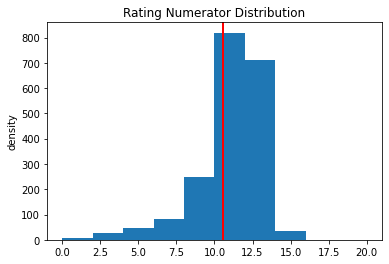

In [178]:
import seaborn as sns

plt.hist(tweet_all.rating_numerator,range=[0,20])
plt.title('Rating Numerator Distribution')
plt.ylabel('density')
plt.axvline(tweet_all.rating_numerator.mean(), color='red', linewidth=2);

In [167]:
tweet_all.rating_numerator.describe()

count    1979.000000
mean     10.555725  
std      2.180938   
min      0.000000   
25%      10.000000  
50%      11.000000  
75%      12.000000  
max      14.000000  
Name: rating_numerator, dtype: float64

#### summary:
The average rating is 10.55 which is above the rating renominator. In fact, more than 75% of the dogs were rated above 10. 

### 2. Plot the moving average of rating numerator to see if there is an overall change over time?

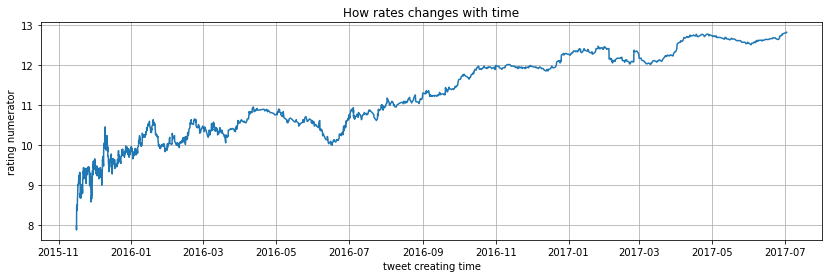

In [157]:
# calculate the moving average for every 50 rates
rate_smooth = tweet_all.rating_numerator.rolling(window=50).mean()

# plot the moving average rate with time
plt.figure(figsize=(14, 4))
plt.plot(tweet_all.timestamp,rate_smooth)
plt.title('How rates changes with time')
plt.xlabel('tweet creating time')
plt.ylabel('rating numerator')
plt.grid(axis='both')

#### summary:
The rating numerator gradually increased with time. 

### 3. How retweet count correlates to favorite count? do they also correlate with dog rating?

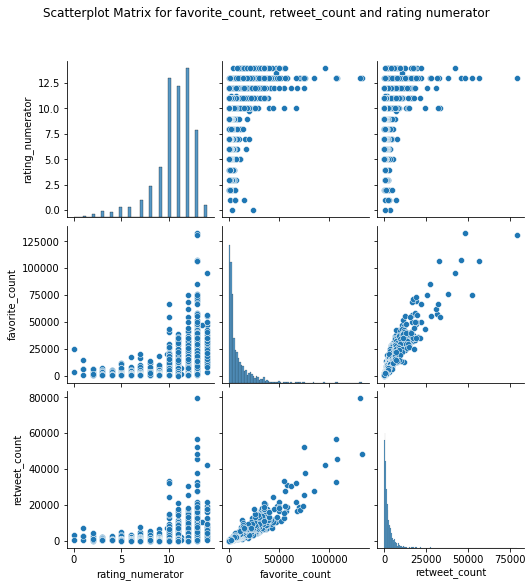

In [158]:
# make pair plot for favorite_count, retweet_count and rating numerator
df = tweet_all[['rating_numerator','favorite_count','retweet_count']]
g = sns.pairplot(df)
title = 'Scatterplot Matrix for favorite_count, retweet_count and rating numerator'
g.fig.suptitle(title, y=1.08)
plt.show()

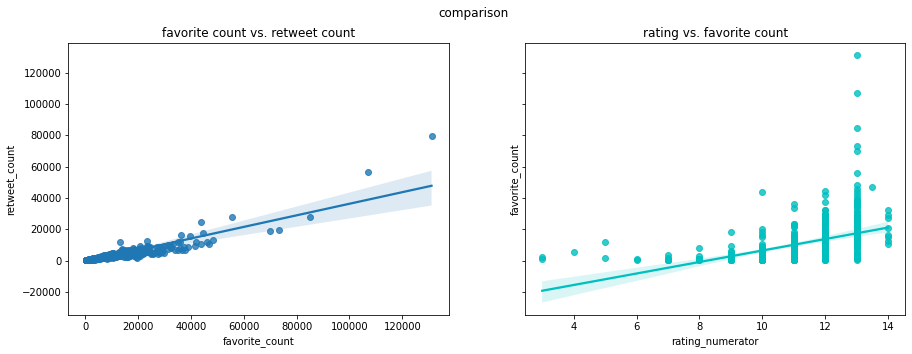

In [189]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('comparison')

sns.regplot(x=df.favorite_count, y=df.retweet_count,ax=axes[0])
axes[0].set_title('favorite count vs. retweet count')

sns.regplot(x=df.rating_numerator, y=df.favorite_count, color="c",ax=axes[1])
axes[1].set_title('rating vs. favorite count')

plt.show()

#### summary:
From the figures, we observe that the favorite count is positively correlated with retweet count. Tweets with high favorite count are more frequently been retweeted. 
Tweets with higher rating also get more favorite count. 

### 4. Based on the image prediction, does certain dog breeds have relative higher rates than the others?

In [160]:
tweet_all.p1.value_counts()

golden_retriever      136
Labrador_retriever    92 
Pembroke              88 
Chihuahua             79 
pug                   54 
                      .. 
alp                   1  
hammer                1  
nail                  1  
timber_wolf           1  
desktop_computer      1  
Name: p1, Length: 373, dtype: int64

Compare rating for dog breeds with more than 50 counts, which are:

golden_retriever, Labrador_retriever, Pembroke ,Chihuahua, pug. 

In [161]:
dog_breeds = ['golden_retriever', 'Labrador_retriever', 'Pembroke' ,'Chihuahua', 'pug']
df = tweet_all[tweet_all['p1'].isin(dog_breeds)]

In [162]:
df.groupby('p1').rating_numerator.describe()

,count,mean,std,min,25%,50%,75%,max
p1,,,,,,,,
Chihuahua,79.0,10.708861,1.975179,3.0,10.00,11.0,12.0,14.0
Labrador_retriever,92.0,11.130435,1.344238,7.0,10.00,11.0,12.0,13.0
Pembroke,88.0,11.443182,1.721119,4.0,11.00,12.0,12.0,14.0
golden_retriever,136.0,11.643382,1.207857,8.0,11.00,12.0,12.0,14.0
pug,54.0,10.240741,1.912572,3.0,9.25,10.0,11.0,13.0


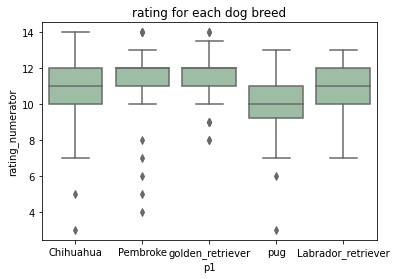

In [163]:
sns.boxplot(x='p1', y='rating_numerator', data=df,color='#99c2a2')
plt.title('rating for each dog breed')
plt.show()

In [164]:
# run anova analysis

import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('rating_numerator ~ C(p1)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(p1),100.609738,4.0,9.995428,9.406658e-08
Residual,1117.278904,444.0,NaN,NaN


In [165]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

mcDate = multi.MultiComparison(df['rating_numerator'],df['p1'])
Results = mcDate.tukeyhsd()
print(Results)

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
         Chihuahua Labrador_retriever   0.4216  0.415 -0.2449   1.088  False
         Chihuahua           Pembroke   0.7343 0.0247  0.0609  1.4077   True
         Chihuahua   golden_retriever   0.9345 0.0004  0.3199  1.5492   True
         Chihuahua                pug  -0.4681 0.4528 -1.2353  0.2991  False
Labrador_retriever           Pembroke   0.3127 0.6775 -0.3351  0.9606  False
Labrador_retriever   golden_retriever   0.5129 0.1184 -0.0736  1.0995  False
Labrador_retriever                pug  -0.8897 0.0101 -1.6345 -0.1448   True
          Pembroke   golden_retriever   0.2002 0.8882 -0.3942  0.7946  False
          Pembroke                pug  -1.2024 0.0001 -1.9535 -0.4514   True
  golden_retriever                pug  -1.4026    0.0 -2.1015 -0.7038   True

#### summary:
A one-way ANOVA indicates a significant effect of dog breeds on rating.

A post-hoc evaluation indicates Chihuahua got significant less rating than Labrador retriever but more rating than pug. Labrador retriever got significant less rating than Pembroke and golden retriever. Pembroke got significant less rating than golden retriever.